Descriptive Statistics:
                          Mean  Median  Standard Deviation  Skewness  Kurtosis
CustomerID              100.50   100.5           57.879185  0.000000 -1.200060
Age                      38.85    36.0           13.969007  0.481919 -0.684751
Annual Income (k$)       60.56    61.5           26.264721  0.319424 -0.125893
Spending Score (1-100)   50.20    50.0           25.823522 -0.046865 -0.835958


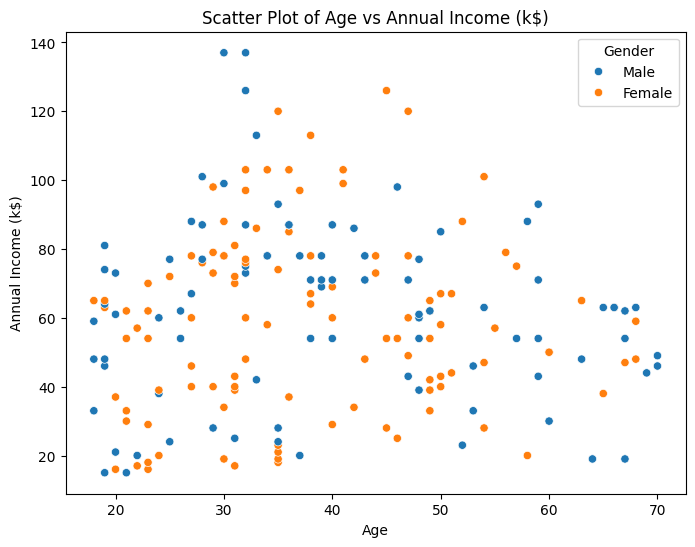

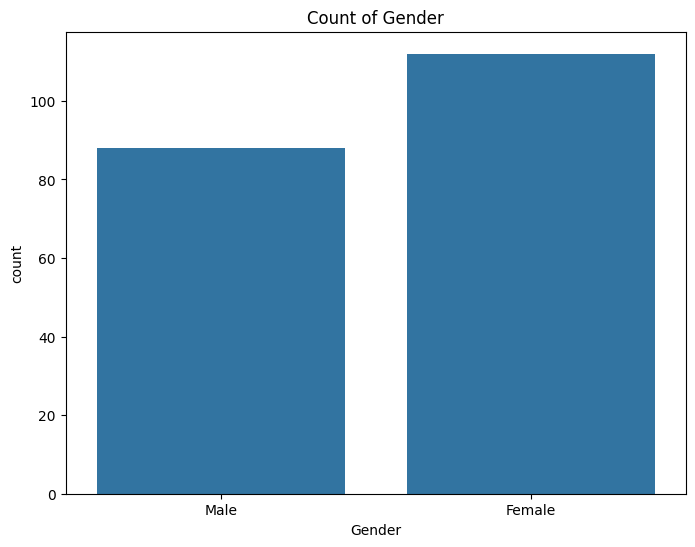

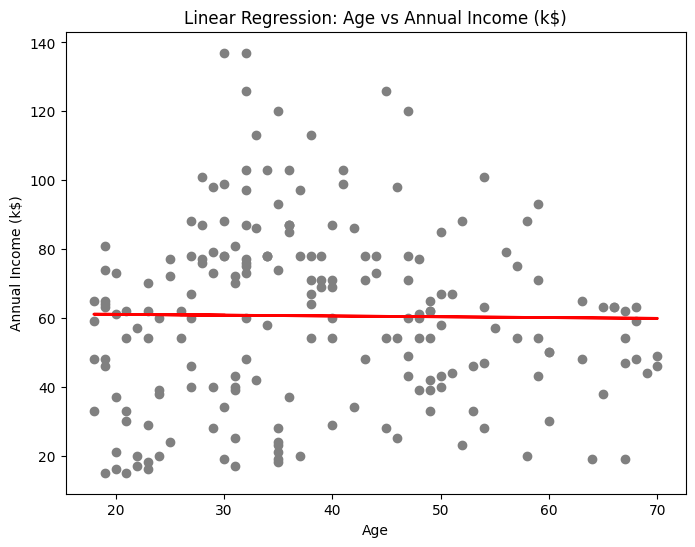

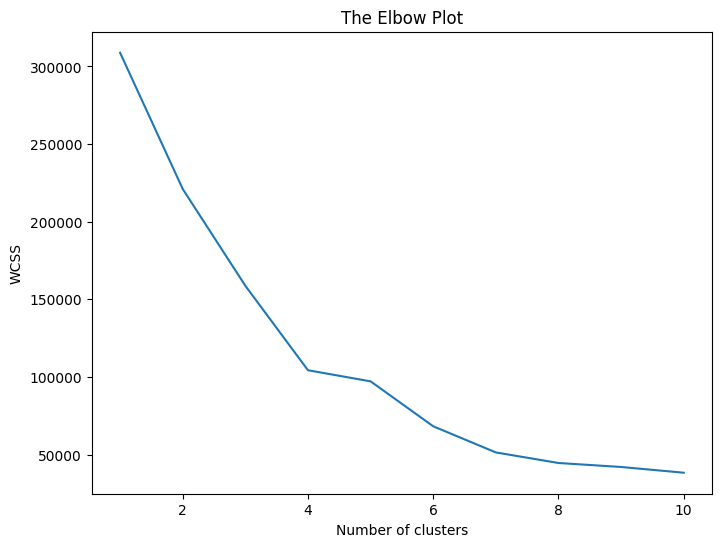

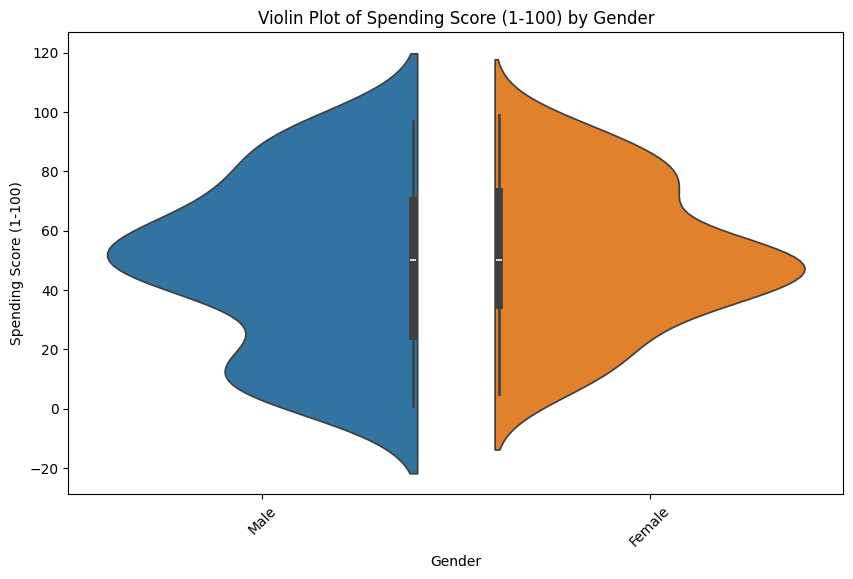


K-means Clustering Results:
Cluster
0    89
1    11
2    29
3    38
4    33
dtype: int64


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis

def load_dataset(file_path):
    return pd.read_csv(file_path)

def calculate_descriptive_statistics(data):
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    skewness = data.apply(skew)
    kurtosis_val = data.apply(kurtosis)
    
    statistics = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurtosis_val
    })
    
    return statistics

def plot_scatter(data, x_column, y_column, hue=None):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data, hue=hue)
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.show()

def plot_count(data, column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Count of {column}')
    plt.show()

def plot_line_fit(data, x_column, y_column):
    X = data[x_column].values.reshape(-1, 1)
    y = data[y_column].values

    model = LinearRegression()
    model.fit(X, y)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='gray')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.title(f'Linear Regression: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

def plot_elbow(data, columns, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data[columns])
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters+1), wcss)
    plt.title('The Elbow Plot')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

def plot_violin(data, x_column, y_column, hue=None):
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x=x_column, y=y_column, hue=hue, split=True)
    plt.title(f'Violin Plot of {y_column} by {x_column}')
    plt.xticks(rotation=45)
    plt.show()

# Load the dataset
mall_customers = load_dataset('Mall_Customers.csv')

# Descriptive Statistics
statistics = calculate_descriptive_statistics(mall_customers.select_dtypes(include=[np.number]))
print("Descriptive Statistics:")
print(statistics)

# Scatter Plot
plot_scatter(mall_customers, 'Age', 'Annual Income (k$)', hue='Gender')

# Bar Plot
plot_count(mall_customers, 'Gender')

# Line Fitting
plot_line_fit(mall_customers, 'Age', 'Annual Income (k$)')

# Elbow Plot for K-means Clustering
plot_elbow(mall_customers, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Violin Plot
plot_violin(mall_customers, 'Gender', 'Spending Score (1-100)', hue='Gender')

# K-means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(mall_customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
mall_customers['Cluster'] = kmeans.labels_

print("\nK-means Clustering Results:")
print(mall_customers.groupby('Cluster').size())
